In [1]:
import pandas as pd
import numpy as np

# PCA

In [83]:
class PCA():
    def __init__(self,n_components,way=None):
        '''
        初始化pca
        '''
        self.n_components = n_components
        self.way = way
    def fit(self,X):
        '''
        训练数据 得到主成分
        返回主成分的特征值，转换向量，累积贡献率
        '''
        way = self.way
        n_components = self.n_components
        n = len(X)
        x_bar = sum(X)/n
        S = np.dot((X-x_bar).T,(X-x_bar))/(n-1)

        if way:
            R = np.zeros((len(S),len(S)))
            sii=np.diag(S)
            for i in range(len(S)):
                for j in range(len(S)):
                    R[i][j] = S[i][j]/(pow(sii[i],0.5)*pow(sii[j],0.5))
            lamda,t = np.linalg.eig(R)
        
        else:
            lamda,t = np.linalg.eig(S)
        dic_lambda = {l:t for l,t in zip(lamda,t)}
        lambda_xh = {lamb:xh for lamb,xh in zip(lamda,range(0,len(lamda)))}
        sort_dic = sorted(dic_lambda.items(),key=lambda dic_lambda:dic_lambda[0],reverse=True)
        ##得到特征值以及转换向量
        lambda_t = sort_dic[:n_components]
        n_lambda = np.array([i[0] for i in lambda_t])
        trans = np.array([i[1] for i in lambda_t]).T
        
        #得到m个主成分对Xi的贡献率
        contri_rate = {}
        ##X = Ty
        #trans_p = np.array([i[1]/sum(i[1]**2) for i in sort_dic]).T
        trans_p = np.array([i[1] for i in sort_dic]).T
        lamda_all = np.array([i[0] for i in sort_dic])
        T = np.linalg.inv(trans_p)[:,:n_components]
        for col in data.columns:
            idx = list(data.columns).index(col)
            if way:
                contri_rate[col] = np.dot(T[idx,:]**2,n_lambda)
            else:
                rr = 0
                #print(np.diag(S))
                ss = sorted(np.diag(S),reverse=True)
                for i,j,k in zip(T[idx,:],n_lambda,ss):
                    rr+=(i**2*j)/k
                contri_rate[col] = rr
        
        res = {
            'lambda':n_lambda,
            't':trans,
            'rate': sum(n_lambda)/sum(lamda),
            'x_bar':x_bar,
            'S':S,
            'to_Xi_contribute_rate':contri_rate
        }
        return res

    def fit_transform(self,X):
        '''
        输入X，将X转换为n_components个主成分转换的结果
        '''
        way = self.way
        n_components = self.n_components
        trans = self.fit(X)['t']
        x_bar = self.fit(X)['x_bar']

        if way:
            X = X-x_bar
        else:
            diag = np.sqrt(np.diag(self.fit(X)['S']))
            eyes = np.eye(len(diag))
            for i in range(len(diag)):
                eyes[i][i] = diag[i]
            X = np.dot((X-x_bar),np.linalg.inv(eyes))
        return np.dot(X,trans)
    
    

# 读取数据

In [3]:
data = pd.read_excel('/Users/kanjisuo/Downloads/data/美国各州犯罪情况.xlsx',index_col=0)
data.head()

,杀人罪,强奸罪,抢劫罪,伤害罪,夜盗罪,盗窃罪,汽车犯罪
州,,,,,,,
Alabama,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7
Alaska,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3
Arizona,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5
Arkansas,8.8,27.6,83.2,203.4,972.6,1862.1,183.4
California,11.5,49.4,287.0,358.0,2139.4,3499.8,663.5


In [22]:
np.diag([[1,2,3],[4,5,6]])

array([1, 5])

In [4]:
import  matplotlib.pyplot as plt

Text(0, 0.5, 'X1')

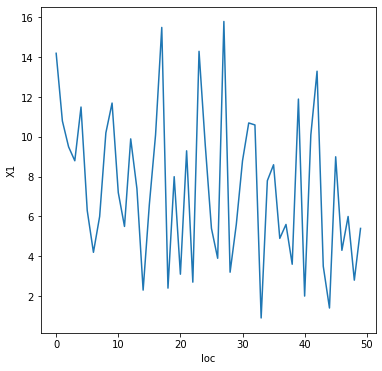

In [19]:
plt.figure(figsize=(6,6))
plt.plot(np.arange(50),data.杀人罪)
plt.xlabel('loc')
plt.ylabel("X1")

# 实例化对象

In [87]:
pca = PCA(n_components=3) ##使用协方差矩阵
pca2 = PCA(n_components=3,way=2) ##使用相关系数矩阵

In [86]:
res1 = pca.fit(np.array(data)) ##得到主成分分析结果
res2 = pca2.fit(np.array(data))
res2

{'lambda': array([4.11495951, 1.23872183, 0.72581663]),
 't': array([[ 0.30027916,  0.43175936,  0.39687549],
        [ 0.62917444,  0.16943512, -0.04224698],
        [ 0.1782453 , -0.24419758,  0.49586087],
        [-0.26759277,  0.29648548,  0.00390268],
        [ 0.23211411, -0.06221567,  0.55798926],
        [-0.53812286, -0.18847069,  0.51997683],
        [-0.25911677,  0.77327066,  0.11438481]]),
 'rate': 0.8684997096636736,
 'x_bar': array([   7.444,   25.734,  124.092,  211.3  , 1291.904, 2671.288,
         377.526]),
 'S': array([[1.49519020e+01, 2.50137796e+01, 1.65245869e+02, 2.51414082e+02,
         6.45165331e+02, 2.86080947e+02, 5.14602612e+01],
        [2.50137796e+01, 1.15769637e+02, 5.62639257e+02, 7.98507347e+02,
         3.31358639e+03, 4.79556021e+03, 7.26012567e+02],
        [1.65245869e+02, 5.62639257e+02, 7.80546932e+03, 4.93416082e+03,
         2.43470033e+04, 2.86507691e+04, 1.00924208e+04],
        [2.51414082e+02, 7.98507347e+02, 4.93416082e+03, 1.00506739e+0

In [88]:
X_res = pca.fit_transform(np.array(data))
X_res2 = pca2.fit_transform(np.array(data))
print(X_res2.shape)

(50, 3)


In [90]:
pd.DataFrame(X_res2,index=data.index,columns=['x1','x2','x3'])

,x1,x2,x3
州,,,
Alabama,392.472713,112.990233,-519.378350
Alaska,-471.054109,190.500760,415.388477
Arizona,-756.461881,-327.357280,1537.103645
Arkansas,408.035293,30.807120,-640.980523
California,-317.336426,21.731288,1018.373928
Colorado,-543.040503,-180.130995,1033.196037
Connecticut,-0.463321,145.137536,30.011551
Delaware,-464.964950,-158.801616,767.626744
Florida,-533.278515,-217.441114,954.986341


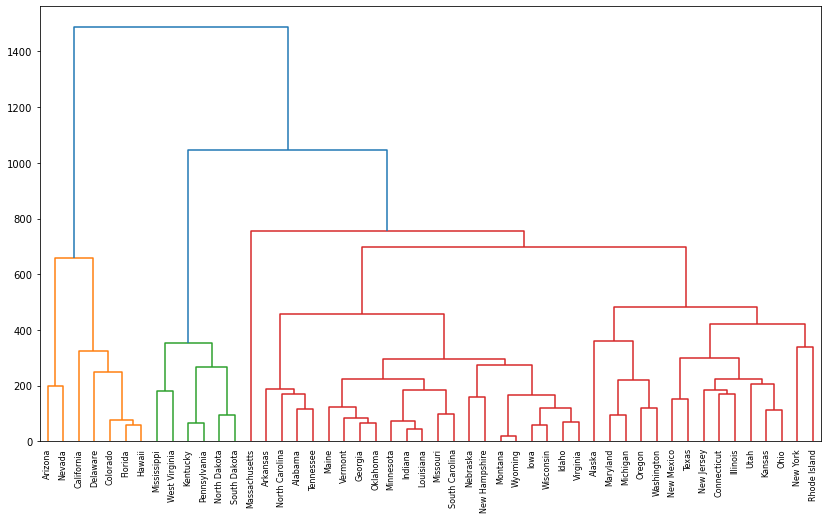

In [110]:
from scipy.cluster import hierarchy as sch
from matplotlib import pyplot as plt
plt.figure(figsize=(14,8))
#1. 层次聚类
#生成点与点之间的距离矩阵,这里用的欧氏距离:
disMat = sch.distance.pdist(pd.DataFrame(X_res2,index=data.index,columns=['x1','x2','x3']),'euclidean') 

#进行层次聚类:
Z=sch.linkage(disMat,method='average') 
#将层级聚类结果以树状图表示出来并保存为plot_dendrogram.png
P=sch.dendrogram(Z,labels=list(data.index),leaf_rotation=90)


# 对比调包

In [25]:
from sklearn.decomposition import PCA

In [28]:
pca3 = PCA(n_components=4)

In [31]:
pca3.fit(np.array(data))
print(pca3.explained_variance_ratio_)

[0.8735949  0.08274478 0.03147604 0.00820624]


In [32]:
X_res3 = pca3.fit_transform(np.array(data))
print(X_res3.shape)

(50, 4)
